In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("✅ Libraries imported!")

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("📊 Data loaded successfully!")
print(f"Training data shape: {train_df.shape}")

In [1]:
# Cell 1: Test if packages are installed
print("🚀 Testing package installation...")

try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    print("✅ ALL PACKAGES INSTALLED SUCCESSFULLY!")
    print("You're ready to analyze the Titanic data!")
except ImportError as e:
    print(f"❌ Error: {e}")
    print("Please install the packages using the terminal")

🚀 Testing package installation...
✅ ALL PACKAGES INSTALLED SUCCESSFULLY!
You're ready to analyze the Titanic data!


In [2]:
# Cell 2: Load the Titanic data
print("📂 Loading Titanic dataset...")

# Load the CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

print("✅ DATA LOADED SUCCESSFULLY!")
print(f"Training data: {train_df.shape} rows, {train_df.shape[1]} columns")
print(f"Test data: {test_df.shape} rows, {test_df.shape[1]} columns")

# Show first few rows
print("\n👀 First look at the data:")
train_df.head()

📂 Loading Titanic dataset...
✅ DATA LOADED SUCCESSFULLY!
Training data: (891, 12) rows, 12 columns
Test data: (418, 11) rows, 11 columns

👀 First look at the data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Cell 3: Basic data exploration
print("🔍 EXPLORING THE DATA")

print("\n📊 Basic info:")
print(train_df.info())

print("\n📈 Basic statistics:")
print(train_df.describe())

print("\n🎯 Survival count:")
survival_count = train_df['Survived'].value_counts()
print(survival_count)
print(f"Survival rate: {(survival_count[1] / len(train_df) * 100):.1f}%")

🔍 EXPLORING THE DATA

📊 Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📈 Basic statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642

📊 Creating survival visualization...


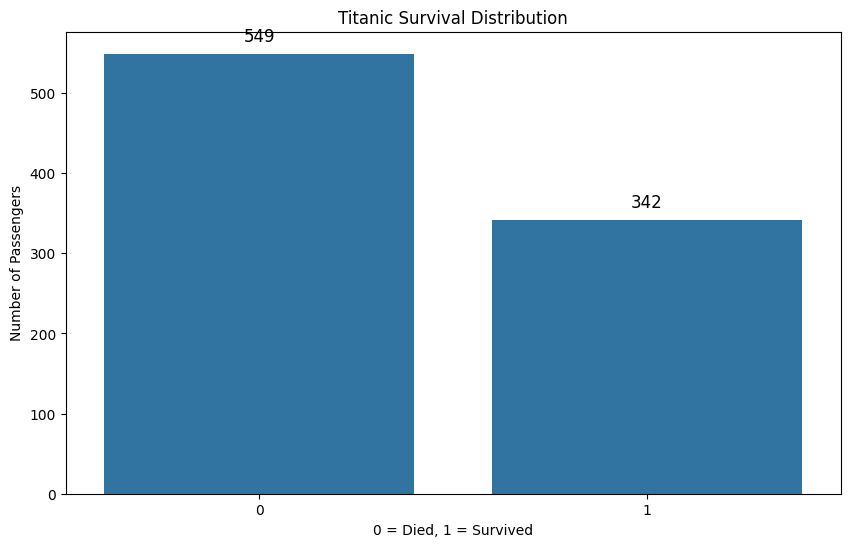

🎨 Chart created successfully!


In [4]:
# Cell 4: First visualization - Survival chart
print("📊 Creating survival visualization...")

plt.figure(figsize=(10, 6))

# Create a bar chart of survival
sns.countplot(data=train_df, x='Survived')
plt.title('Titanic Survival Distribution')
plt.xlabel('0 = Died, 1 = Survived')
plt.ylabel('Number of Passengers')

# Add count labels on bars
for i, count in enumerate(train_df['Survived'].value_counts().sort_index()):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

print("🎨 Chart created successfully!")

In [5]:
# Cell 5: Check for missing data and data quality
print("🔍 DATA QUALITY ANALYSIS")

print("Missing values in training data:")
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])

print(f"\n📝 Data types:")
print(train_df.dtypes)

🔍 DATA QUALITY ANALYSIS
Missing values in training data:
          Missing Count  Missing Percentage
Age                 177           19.865320
Cabin               687           77.104377
Embarked              2            0.224467

📝 Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


🚺🚹 SURVIVAL BY GENDER


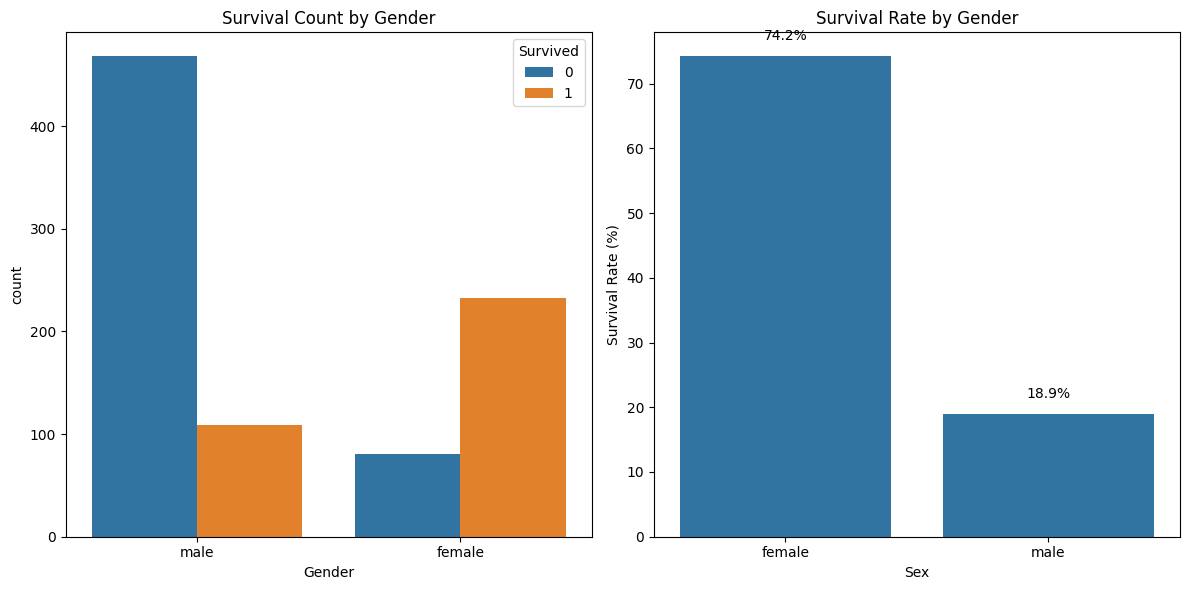


📊 Survival Rates:
  female: 74.2%
  male: 18.9%


In [6]:
# Cell 6: Survival by Gender - One of the most important insights!
print("🚺🚹 SURVIVAL BY GENDER")

plt.figure(figsize=(12, 6))

# Create subplots
plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')

plt.subplot(1, 2, 2)
# Calculate survival rates
survival_rates = train_df.groupby('Sex')['Survived'].mean() * 100
sns.barplot(x=survival_rates.index, y=survival_rates.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')

# Add percentage labels
for i, rate in enumerate(survival_rates.values):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n📊 Survival Rates:")
for gender, rate in survival_rates.items():
    print(f"  {gender}: {rate:.1f}%")

💺 SURVIVAL BY PASSENGER CLASS


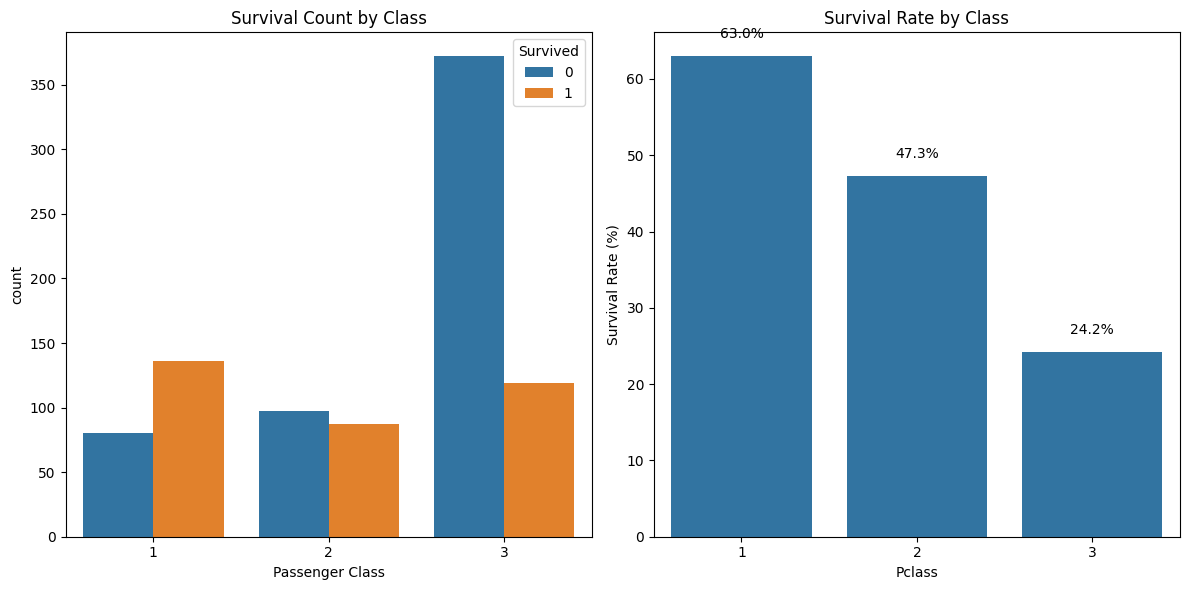


📊 Survival Rates by Class:
  Class 1: 63.0%
  Class 2: 47.3%
  Class 3: 24.2%


In [7]:
# Cell 7: Survival by Passenger Class
print("💺 SURVIVAL BY PASSENGER CLASS")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Class')
plt.xlabel('Passenger Class')

plt.subplot(1, 2, 2)
class_survival = train_df.groupby('Pclass')['Survived'].mean() * 100
sns.barplot(x=class_survival.index, y=class_survival.values)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate (%)')

# Add percentage labels
for i, rate in enumerate(class_survival.values):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n📊 Survival Rates by Class:")
for pclass, rate in class_survival.items():
    print(f"  Class {pclass}: {rate:.1f}%")

👶🧓 AGE ANALYSIS


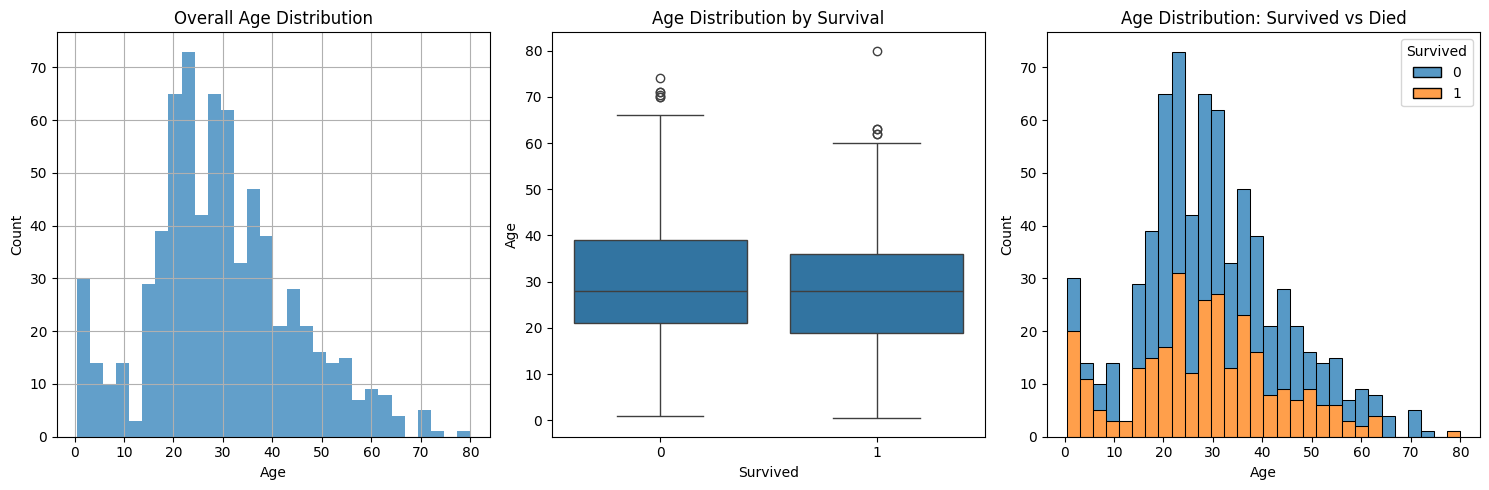


📊 Age Statistics:
  Average age: 29.7 years
  Youngest passenger: 0 years
  Oldest passenger: 80 years
  Missing age values: 177


In [8]:
# Cell 8: Age Distribution Analysis
print("👶🧓 AGE ANALYSIS")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
train_df['Age'].hist(bins=30, alpha=0.7)
plt.title('Overall Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title('Age Distribution by Survival')

plt.subplot(1, 3, 3)
# Age distribution by survival
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Age Distribution: Survived vs Died')

plt.tight_layout()
plt.show()

print(f"\n📊 Age Statistics:")
print(f"  Average age: {train_df['Age'].mean():.1f} years")
print(f"  Youngest passenger: {train_df['Age'].min():.0f} years")
print(f"  Oldest passenger: {train_df['Age'].max():.0f} years")
print(f"  Missing age values: {train_df['Age'].isnull().sum()}")

💰 FARE ANALYSIS


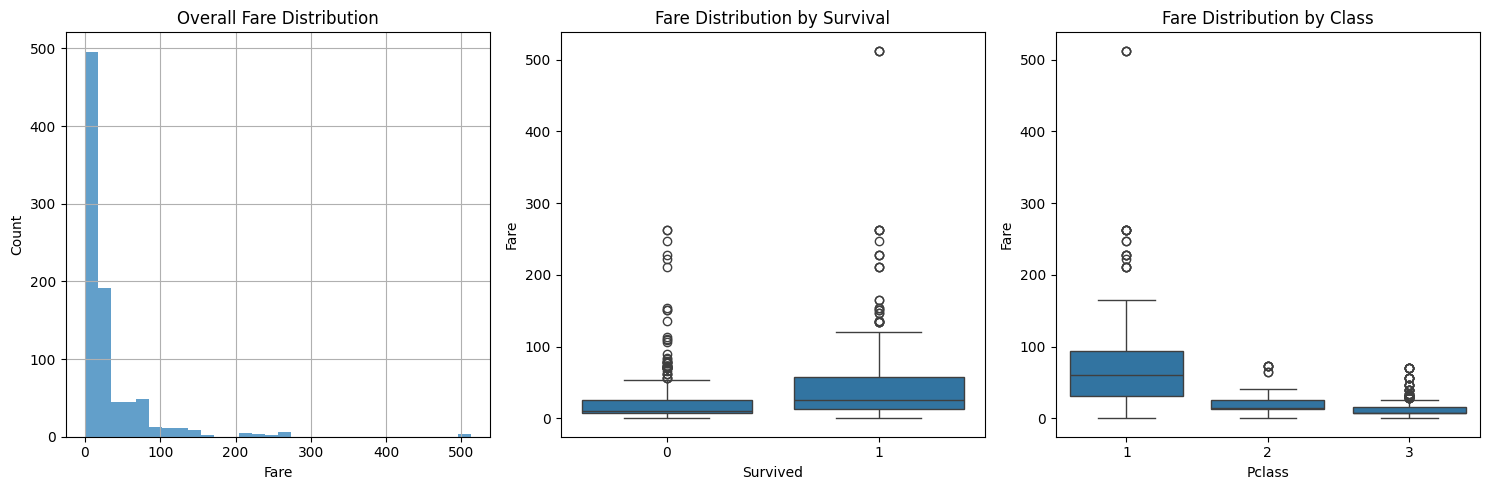


📊 Fare Statistics:
  Average fare: $32.20
  Minimum fare: $0.00
  Maximum fare: $512.33


In [9]:
# Cell 9: Fare Analysis
print("💰 FARE ANALYSIS")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
train_df['Fare'].hist(bins=30, alpha=0.7)
plt.title('Overall Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')

plt.subplot(1, 3, 3)
sns.boxplot(data=train_df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Class')

plt.tight_layout()
plt.show()

print(f"\n📊 Fare Statistics:")
print(f"  Average fare: ${train_df['Fare'].mean():.2f}")
print(f"  Minimum fare: ${train_df['Fare'].min():.2f}")
print(f"  Maximum fare: ${train_df['Fare'].max():.2f}")

👨‍👩‍👧‍👦 FAMILY SIZE ANALYSIS


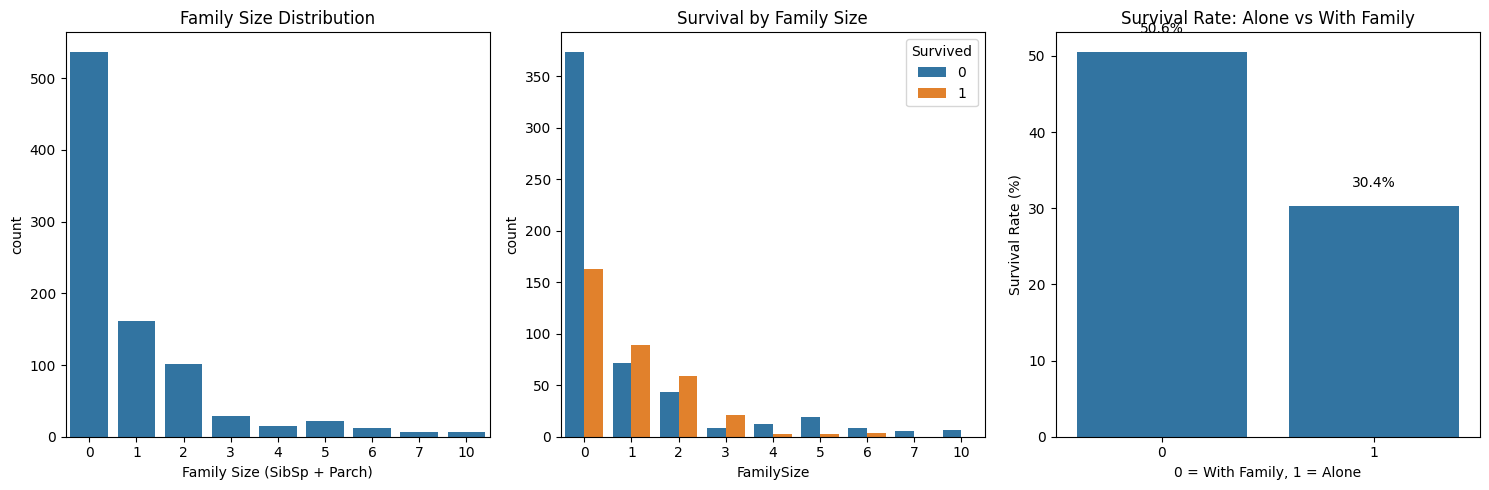


📊 Family Statistics:
  Average family size: 0.9
  Traveling alone: 60.3%


In [10]:
# Cell 10: Family Size Analysis
print("👨‍👩‍👧‍👦 FAMILY SIZE ANALYSIS")

# Create family size feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone'] = (train_df['FamilySize'] == 0).astype(int)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=train_df, x='FamilySize')
plt.title('Family Size Distribution')
plt.xlabel('Family Size (SibSp + Parch)')

plt.subplot(1, 3, 2)
sns.countplot(data=train_df, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')

plt.subplot(1, 3, 3)
alone_survival = train_df.groupby('IsAlone')['Survived'].mean() * 100
sns.barplot(x=alone_survival.index, y=alone_survival.values)
plt.title('Survival Rate: Alone vs With Family')
plt.xlabel('0 = With Family, 1 = Alone')
plt.ylabel('Survival Rate (%)')

# Add percentage labels
for i, rate in enumerate(alone_survival.values):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n📊 Family Statistics:")
print(f"  Average family size: {train_df['FamilySize'].mean():.1f}")
print(f"  Traveling alone: {(train_df['IsAlone'] == 1).mean():.1%}")

📈 CORRELATION ANALYSIS


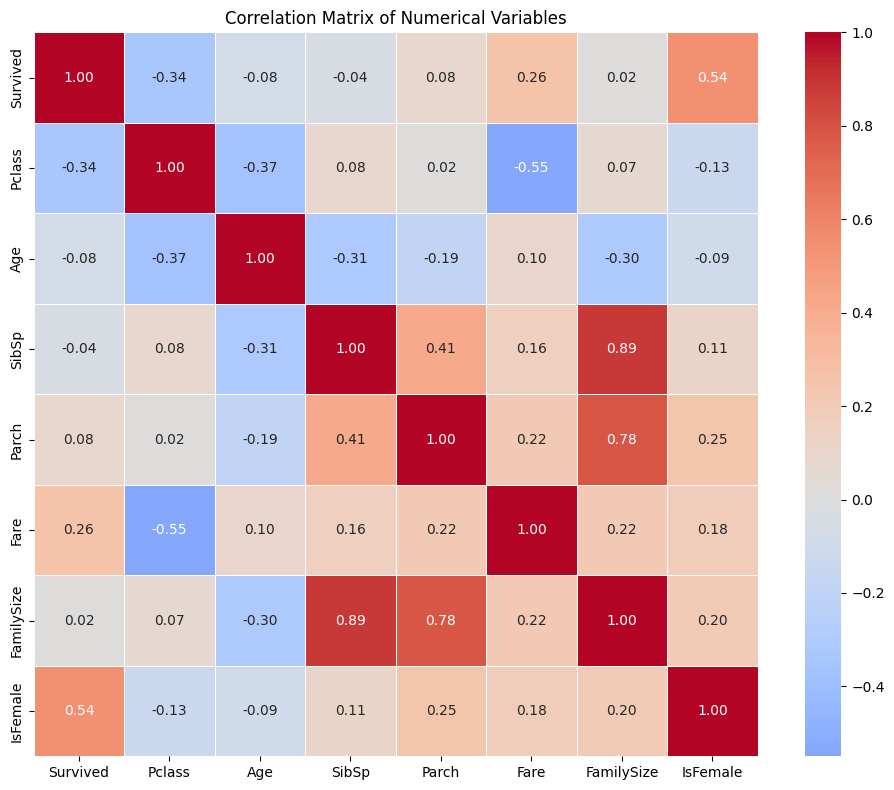


🔗 Top correlations with Survival:
  IsFemale: +0.54
  Fare: +0.26
  Parch: +0.08
  FamilySize: +0.02
  SibSp: -0.04
  Age: -0.08
  Pclass: -0.34


In [11]:
# Cell 11: Correlation Analysis
print("📈 CORRELATION ANALYSIS")

# Prepare data for correlation
corr_data = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']].copy()
corr_data['IsFemale'] = (train_df['Sex'] == 'female').astype(int)

plt.figure(figsize=(10, 8))
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("\n🔗 Top correlations with Survival:")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
for feature, corr in survival_corr.items():
    if feature != 'Survived':
        print(f"  {feature}: {corr:+.2f}")

In [12]:
# Cell 12: Key Findings Summary
print("="*60)
print("📊 TITANIC EDA - KEY FINDINGS SUMMARY")
print("="*60)

print(f"\n🎯 OVERALL SURVIVAL: {train_df['Survived'].mean():.1%}")

print(f"\n🚺🚹 GENDER IMPACT:")
female_survival = train_df[train_df['Sex']=='female']['Survived'].mean()
male_survival = train_df[train_df['Sex']=='male']['Survived'].mean()
print(f"  • Female survival rate: {female_survival:.1%}")
print(f"  • Male survival rate: {male_survival:.1%}")
print(f"  • Females were {female_survival/male_survival:.1f}x more likely to survive")

print(f"\n💺 CLASS IMPACT:")
for pclass in sorted(train_df['Pclass'].unique()):
    class_rate = train_df[train_df['Pclass']==pclass]['Survived'].mean()
    print(f"  • Class {pclass} survival: {class_rate:.1%}")

print(f"\n👶 AGE PATTERNS:")
print(f"  • Average age: {train_df['Age'].mean():.1f} years")
print(f"  • Children (<18) survival: {train_df[train_df['Age'] < 18]['Survived'].mean():.1%}")

print(f"\n💰 FARE PATTERNS:")
print(f"  • Average fare for survivors: ${train_df[train_df['Survived']==1]['Fare'].mean():.2f}")
print(f"  • Average fare for non-survivors: ${train_df[train_df['Survived']==0]['Fare'].mean():.2f}")

print(f"\n👨‍👩‍👧‍👦 FAMILY PATTERNS:")
print(f"  • Traveling alone survival: {train_df[train_df['IsAlone']==1]['Survived'].mean():.1%}")
print(f"  • With family survival: {train_df[train_df['IsAlone']==0]['Survived'].mean():.1%}")

print(f"\n📊 DATA QUALITY:")
print(f"  • Missing Age values: {train_df['Age'].isnull().sum()} ({train_df['Age'].isnull().mean():.1%})")
print(f"  • Missing Cabin values: {train_df['Cabin'].isnull().sum()} ({train_df['Cabin'].isnull().mean():.1%})")

📊 TITANIC EDA - KEY FINDINGS SUMMARY

🎯 OVERALL SURVIVAL: 38.4%

🚺🚹 GENDER IMPACT:
  • Female survival rate: 74.2%
  • Male survival rate: 18.9%
  • Females were 3.9x more likely to survive

💺 CLASS IMPACT:
  • Class 1 survival: 63.0%
  • Class 2 survival: 47.3%
  • Class 3 survival: 24.2%

👶 AGE PATTERNS:
  • Average age: 29.7 years
  • Children (<18) survival: 54.0%

💰 FARE PATTERNS:
  • Average fare for survivors: $48.40
  • Average fare for non-survivors: $22.12

👨‍👩‍👧‍👦 FAMILY PATTERNS:
  • Traveling alone survival: 30.4%
  • With family survival: 50.6%

📊 DATA QUALITY:
  • Missing Age values: 177 (19.9%)
  • Missing Cabin values: 687 (77.1%)
